In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

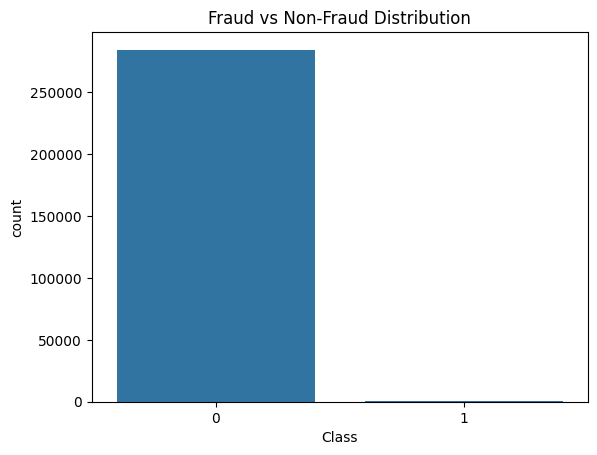

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [6]:
sns.countplot(x="Class", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

fraud_ratio = df["Class"].value_counts(normalize=True) * 100
print(fraud_ratio)

In [7]:
fraud = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

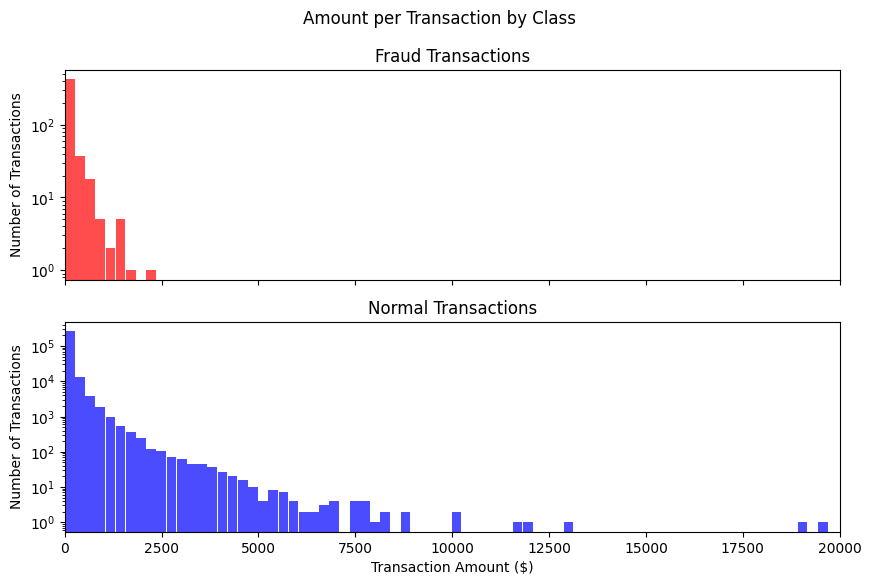

In [8]:
bins = np.linspace(0, 26000, 100)
bin_centers = (bins[:-1] + bins[1:]) / 2

fraud_counts, _ = np.histogram(fraud["Amount"], bins=bins)
normal_counts, _ = np.histogram(normal["Amount"], bins=bins)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

fig.suptitle("Amount per Transaction by Class")

ax1.bar(bin_centers, fraud_counts, width=250, color="red", alpha=0.7)
ax1.set_title("Fraud Transactions")
ax1.set_ylabel("Number of Transactions")

ax2.bar(bin_centers, normal_counts, width=250, color="blue", alpha=0.7)
ax2.set_title("Normal Transactions")
ax2.set_xlabel("Transaction Amount ($)")
ax2.set_ylabel("Number of Transactions")

ax1.set_yscale("log")
ax2.set_yscale("log")

plt.xlim((0, 20000)) 
plt.show()

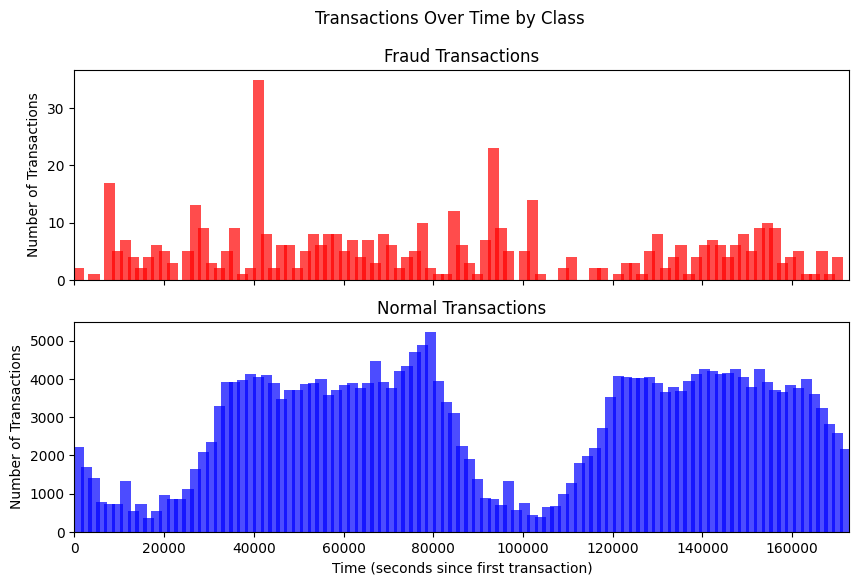

In [9]:
bins = np.linspace(df["Time"].min(), df["Time"].max(), 100)
bin_centers = (bins[:-1] + bins[1:]) / 2

fraud_counts, _ = np.histogram(fraud["Time"], bins=bins)
normal_counts, _ = np.histogram(normal["Time"], bins=bins)

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

fig.suptitle("Transactions Over Time by Class")

ax1.bar(bin_centers, fraud_counts, width=2500, color="red", alpha=0.7)
ax1.set_title("Fraud Transactions")
ax1.set_ylabel("Number of Transactions")

ax2.bar(bin_centers, normal_counts, width=2500, color="blue", alpha=0.7)
ax2.set_title("Normal Transactions")
ax2.set_xlabel("Time (seconds since first transaction)")
ax2.set_ylabel("Number of Transactions")

plt.xlim((df["Time"].min(), df["Time"].max())) 
plt.show()


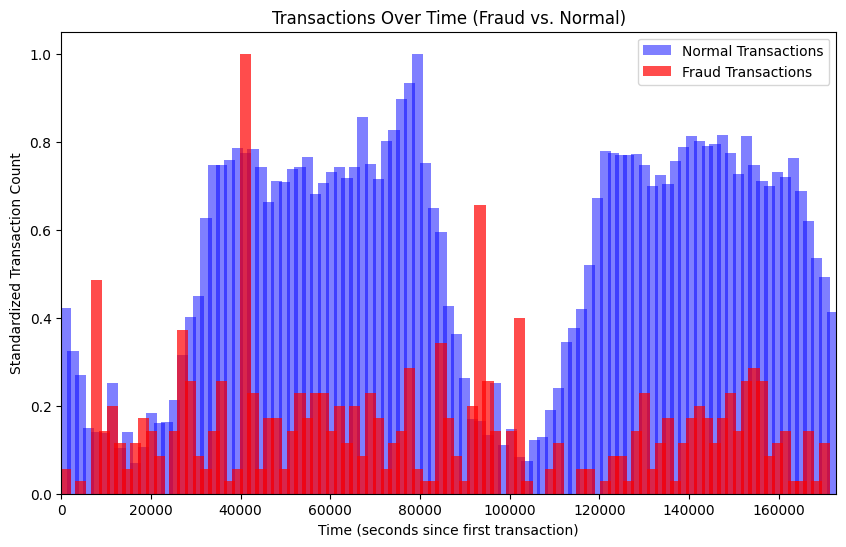

In [10]:
fraud_counts = fraud_counts / fraud_counts.max()
normal_counts = normal_counts / normal_counts.max()

plt.figure(figsize=(10, 6))
plt.title("Transactions Over Time (Fraud vs. Normal)")

plt.bar(bin_centers, normal_counts, width=2500, color="blue", alpha=0.5, label="Normal Transactions")
plt.bar(bin_centers, fraud_counts, width=2500, color="red", alpha=0.7, label="Fraud Transactions")

plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Standardized Transaction Count")
plt.legend()
plt.xlim((df["Time"].min(), df["Time"].max()))

plt.show()

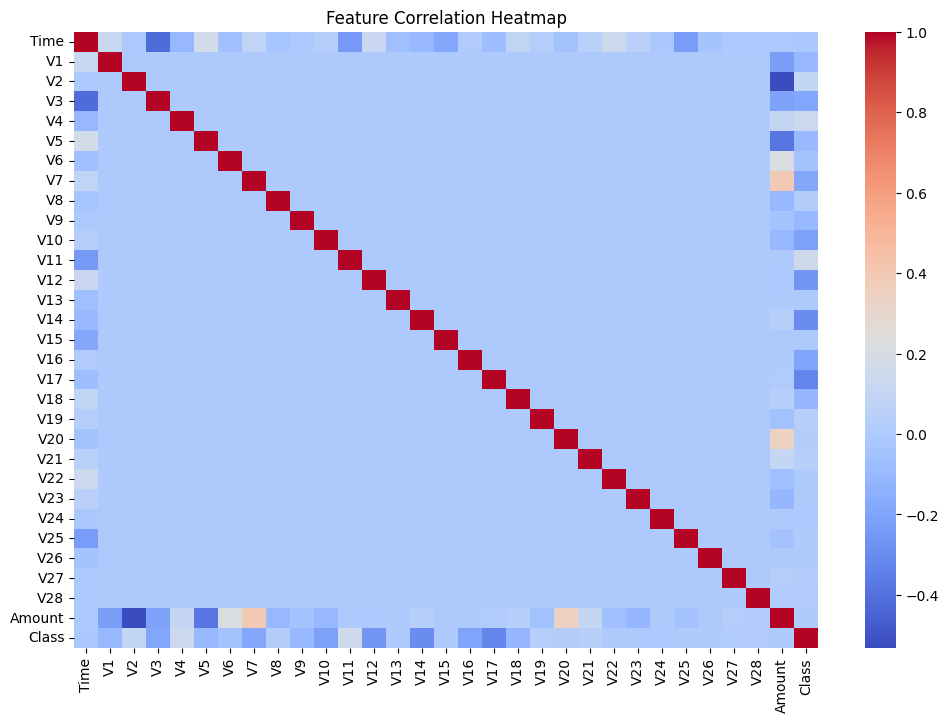

In [11]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

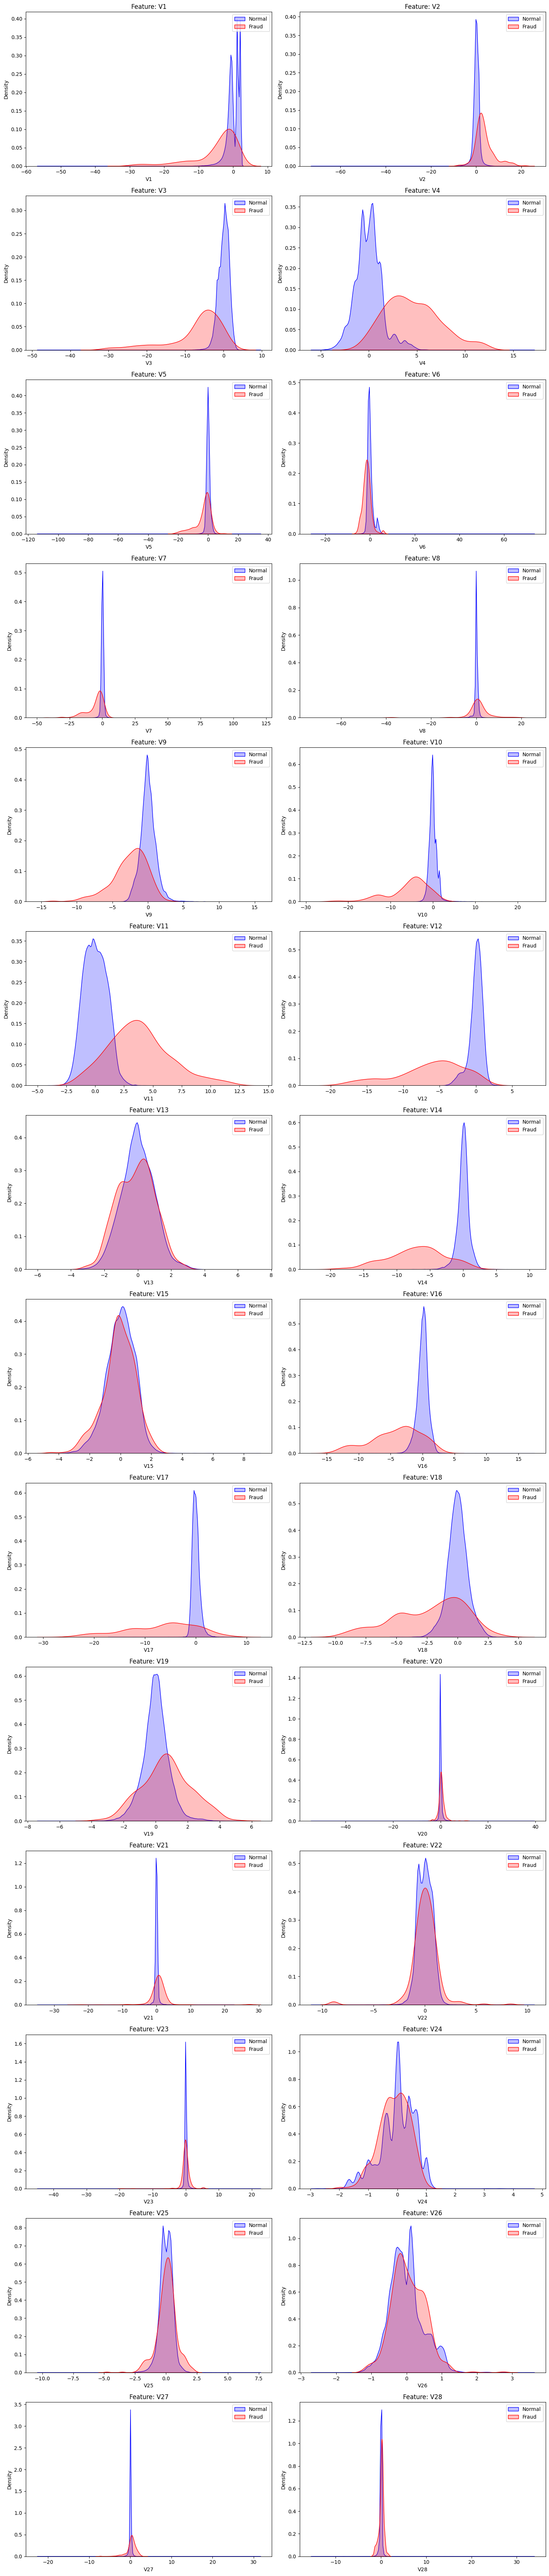

In [12]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

num_features = len(features)
cols = 2
rows = int(np.ceil(num_features / cols)) 

plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(features):
    plt.subplot(rows, cols, i+1)

    sns.kdeplot(df[df["Class"] == 0][feature], label="Normal", color="blue", fill=True)
    sns.kdeplot(df[df["Class"] == 1][feature], label="Fraud", color="red", fill=True)
    
    plt.title(f"Feature: {feature}")
    plt.legend()


plt.tight_layout()
plt.show()

### SMOTE FOR OVERSAMPLING

In [13]:
X = df.drop(columns=["Class"])
y = df["Class"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)  
df_resampled["Class"] = y_resampled

print("Class distribution after SMOTE:")
print(df_resampled["Class"].value_counts())

Class distribution after SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


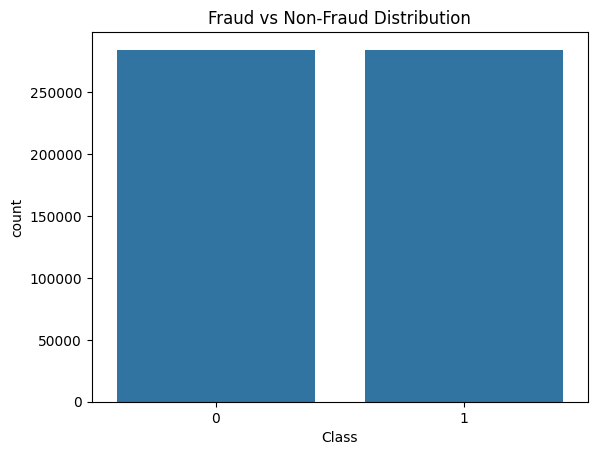

In [14]:
sns.countplot(x="Class", data=df_resampled)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

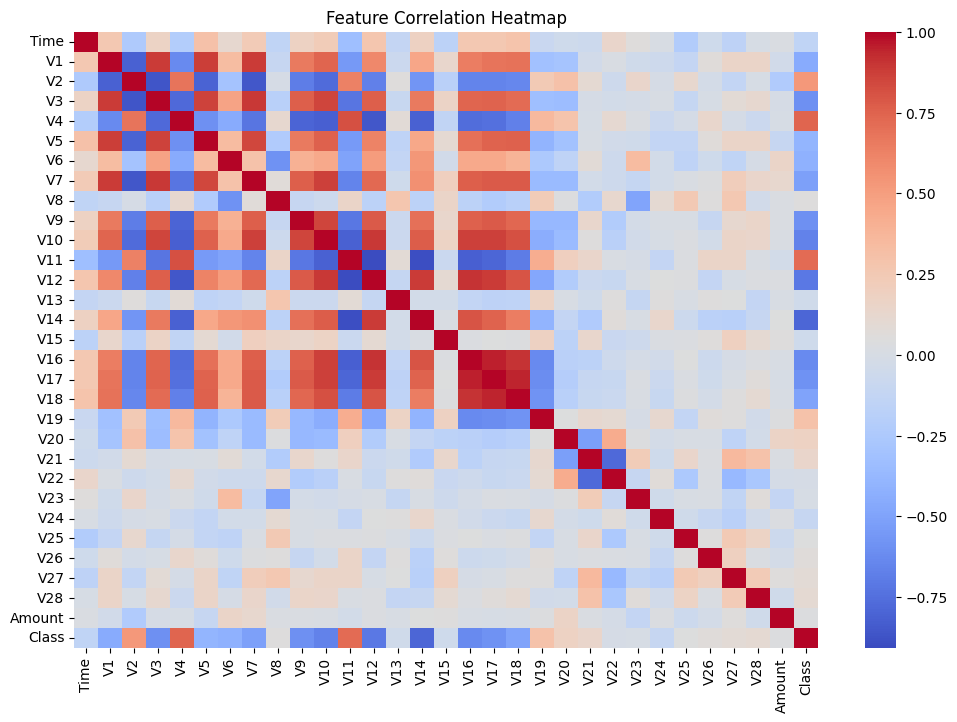

In [15]:
corr_matrix = df_resampled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

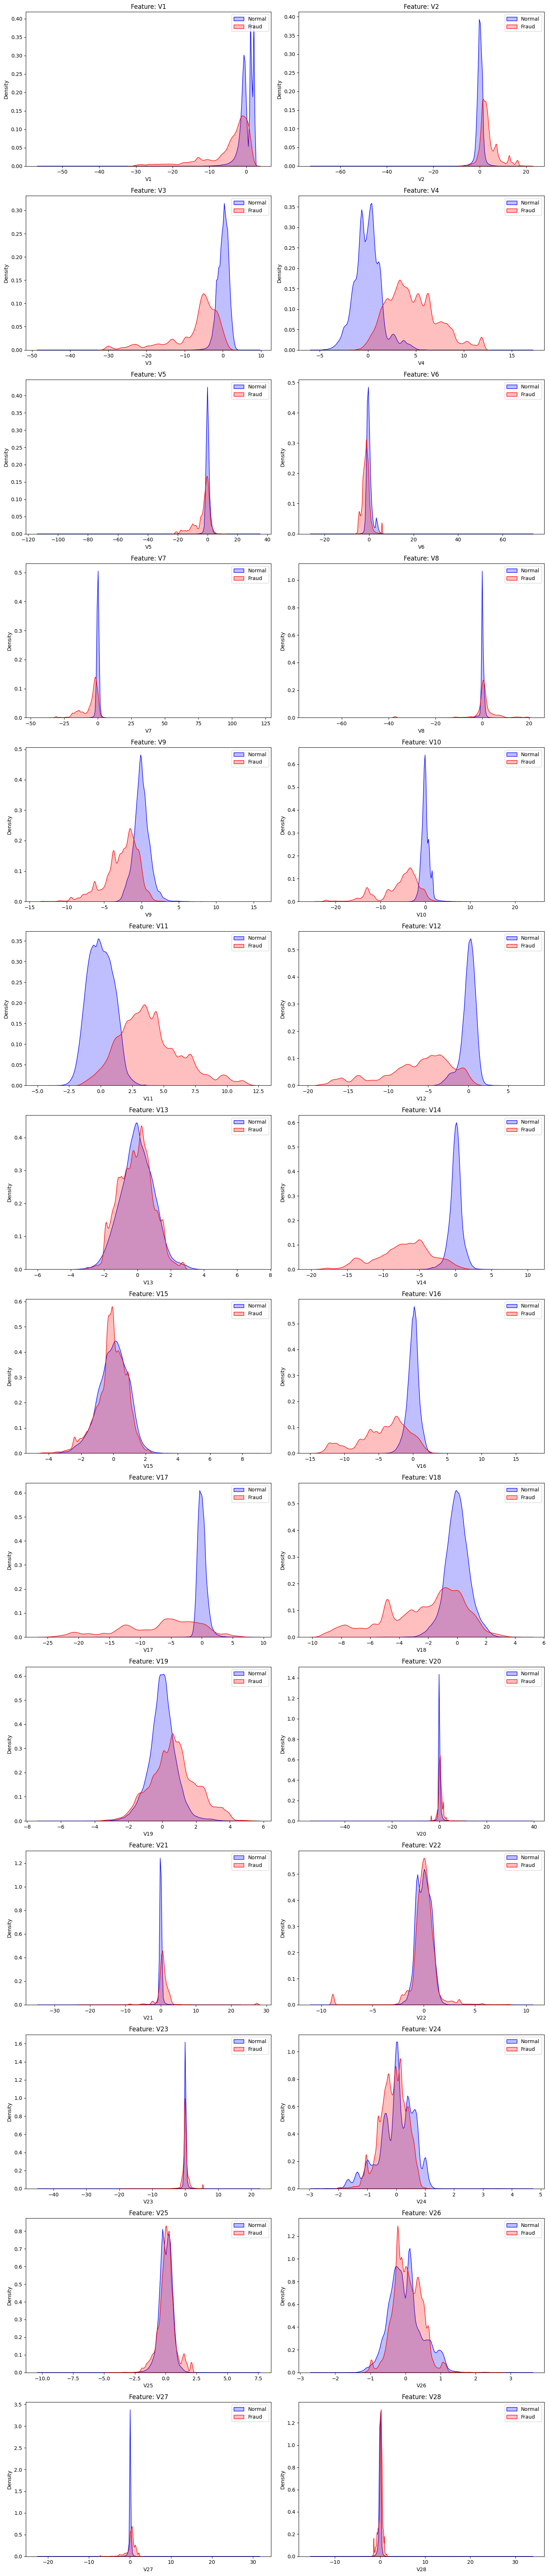

In [16]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

num_features = len(features)
cols = 2
rows = int(np.ceil(num_features / cols)) 

plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(features):
    plt.subplot(rows, cols, i+1)

    sns.kdeplot(df_resampled[df_resampled["Class"] == 0][feature], label="Normal", color="blue", fill=True)
    sns.kdeplot(df_resampled[df_resampled["Class"] == 1][feature], label="Fraud", color="red", fill=True)
    
    plt.title(f"Feature: {feature}")
    plt.legend()


plt.tight_layout()
plt.show()

In [17]:
resampled_fraud = df_resampled[df_resampled["Class"] == 1]
resampled_normal = df_resampled[df_resampled["Class"] == 0]

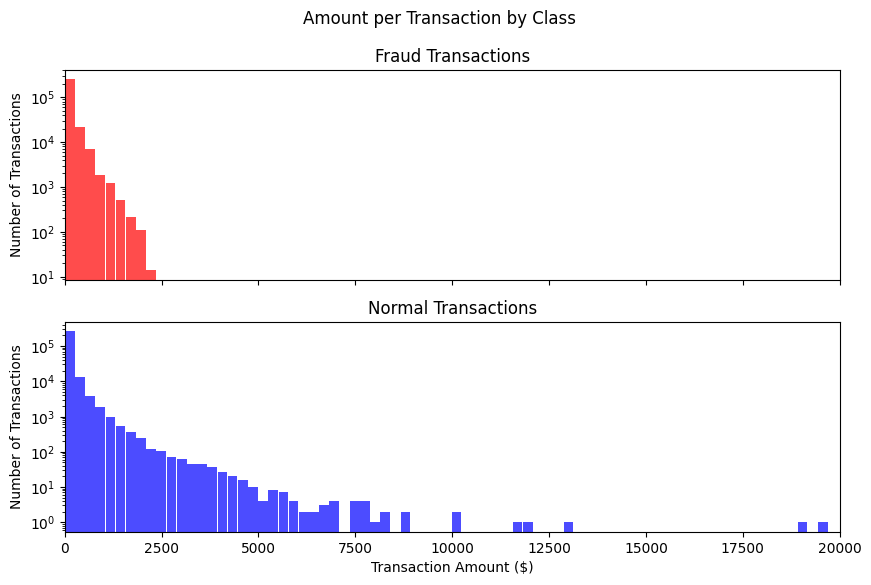

In [18]:
bins = np.linspace(0, 26000, 100)
bin_centers = (bins[:-1] + bins[1:]) / 2

fraud_counts, _ = np.histogram(resampled_fraud["Amount"], bins=bins)
normal_counts, _ = np.histogram(resampled_normal["Amount"], bins=bins)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

fig.suptitle("Amount per Transaction by Class")

ax1.bar(bin_centers, fraud_counts, width=250, color="red", alpha=0.7)
ax1.set_title("Fraud Transactions")
ax1.set_ylabel("Number of Transactions")

ax2.bar(bin_centers, normal_counts, width=250, color="blue", alpha=0.7)
ax2.set_title("Normal Transactions")
ax2.set_xlabel("Transaction Amount ($)")
ax2.set_ylabel("Number of Transactions")

ax1.set_yscale("log")
ax2.set_yscale("log")

plt.xlim((0, 20000)) 
plt.show()

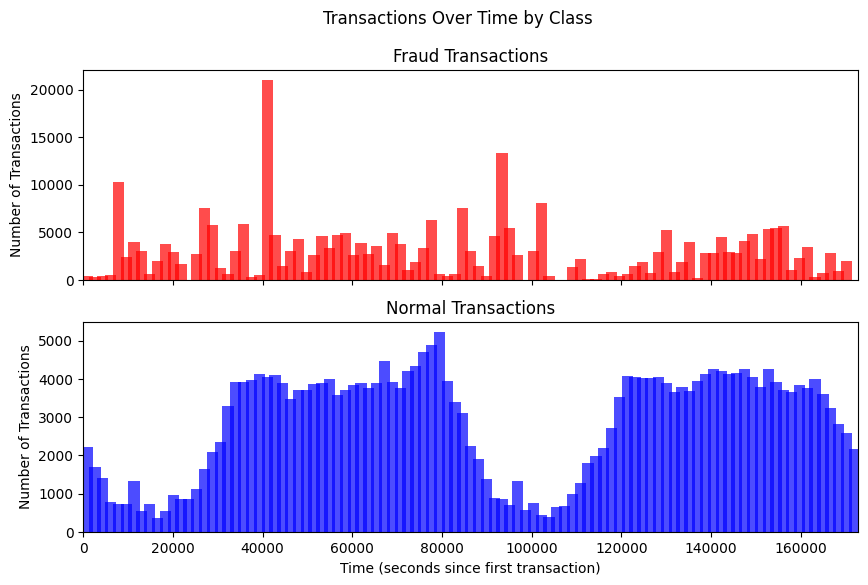

In [19]:
bins = np.linspace(df_resampled["Time"].min(), df_resampled["Time"].max(), 100)
bin_centers = (bins[:-1] + bins[1:]) / 2

resampled_fraud_counts, _ = np.histogram(resampled_fraud["Time"], bins=bins)
resampled_normal_counts, _ = np.histogram(resampled_normal["Time"], bins=bins)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

fig.suptitle("Transactions Over Time by Class")

ax1.bar(bin_centers, resampled_fraud_counts, width=2500, color="red", alpha=0.7)
ax1.set_title("Fraud Transactions")
ax1.set_ylabel("Number of Transactions")

ax2.bar(bin_centers, resampled_normal_counts, width=2500, color="blue", alpha=0.7)
ax2.set_title("Normal Transactions")
ax2.set_xlabel("Time (seconds since first transaction)")
ax2.set_ylabel("Number of Transactions")

plt.xlim((df_resampled["Time"].min(), df_resampled["Time"].max())) 
plt.show()

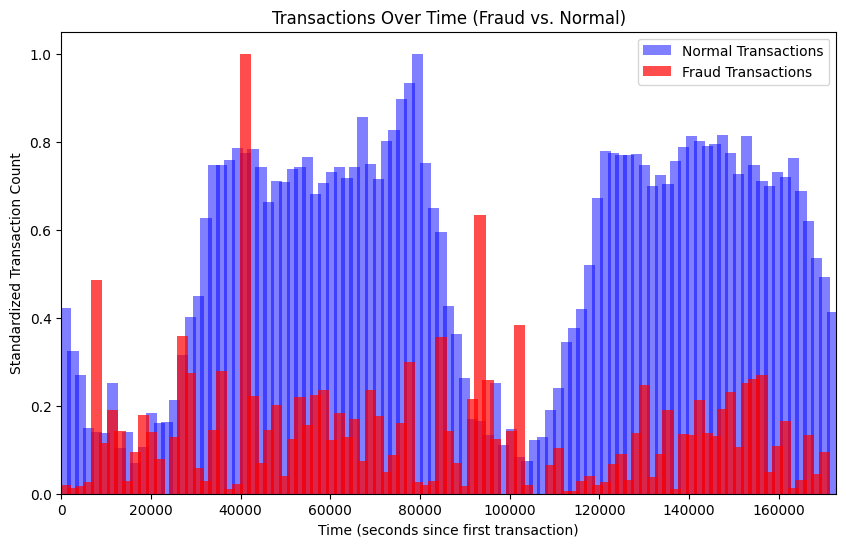

In [20]:
resampled_fraud_counts = resampled_fraud_counts / resampled_fraud_counts.max()
reasmpled_normal_counts = resampled_normal_counts / resampled_normal_counts.max()

plt.figure(figsize=(10, 6))
plt.title("Transactions Over Time (Fraud vs. Normal)")

plt.bar(bin_centers, reasmpled_normal_counts, width=2500, color="blue", alpha=0.5, label="Normal Transactions")
plt.bar(bin_centers, resampled_fraud_counts, width=2500, color="red", alpha=0.7, label="Fraud Transactions")

plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Standardized Transaction Count")
plt.legend()
plt.xlim((df_resampled["Time"].min(), df_resampled["Time"].max()))

plt.show()

## DecisionTreeClassifier

In [21]:
selected_featuresfirst = ["Time", "Amount", "V1", "V2", "V3", "V4", "V9", "V10", "V11", "V12", "V14", "V16", "V17", "V18", "V19"]


selected_features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
X_resampled_selected = df_resampled[selected_features]
y_resampled = df_resampled["Class"]


X_train, X_test, y_train, y_test = train_test_split(X_resampled_selected, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Training set size: (454904, 30)
Testing set size: (113726, 30)
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     56863
           1       0.99      0.99      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

Confusion Matrix:
 [[56323   540]
 [  422 56441]]
Accuracy: 0.9915410724020892


## KNN

In [26]:
selected_features = ["Time", "Amount", "V1", "V2", "V3", "V4", "V9", "V10", "V11", "V12", "V14", "V16", "V17", "V18", "V19"]

In [28]:
selected_featuresfirst = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

X_resampled_selected = df_resampled[selected_featuresfirst]
y_resampled = df_resampled["Class"]

X_train, X_test, y_train, y_test = train_test_split(X_resampled_selected, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

knn_model = KNeighborsClassifier(weights='distance')

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nAccuracy:", accuracy_score(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     56863
           1       0.95      0.99      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726


Confusion Matrix:
 [[54147  2716]
 [  742 56121]]

Accuracy: 0.969593584580483


In [34]:
base_tree = DecisionTreeClassifier(max_depth=1)

adaboost_model = AdaBoostClassifier(
    estimator=base_tree, 
    n_estimators=50, 
    learning_rate=1.0, 
    random_state=42
)


adaboost_model.fit(X_train, y_train)


y_pred = adaboost_model.predict(X_test)


print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     56863
           1       0.98      0.97      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726


Confusion Matrix:
 [[55764  1099]
 [ 1797 55066]]

Accuracy: 0.9745352865659568


## RANDOM FOREST

In [32]:
selected_features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

X_resampled_selected = df_resampled[selected_features]
y_resampled = df_resampled["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10, 
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     56863
           1       1.00      0.99      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726


Confusion Matrix:
 [[56782    81]
 [  787 56076]]

Accuracy: 0.9923676204210119
